In [1]:
#Importing python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Reading the csv file
df = pd.read_csv('SampleSuperstore.csv', encoding='Latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#Summary Statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
#Data Cleaning-Changing date format to pandas date format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
#Display all columns since 'State' is hidden
pd.set_option('display.max_columns', 21)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


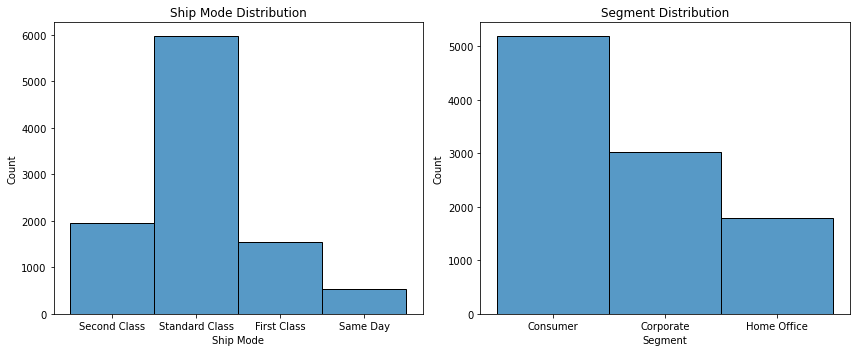

In [5]:
#Summary Distributions of Ship Mode, Segments, City, Sales, Quantity, Discount and Profit
#This summary is meant to show the highest and lowest appearances of elements in a series
fig, axes = plt.subplots(1,2, figsize=(12,5))
fig.set_tight_layout(True)

sns.histplot(df['Ship Mode'], ax=axes[0])
axes[0].title.set_text('Ship Mode Distribution')
sns.histplot(df['Segment'], ax=axes[1])
axes[1].title.set_text('Segment Distribution')

In [6]:
cities = df['City'].value_counts()
dict_cities = dict(cities)

In [7]:
keys = []
values = []
for key, value in dict_cities.items():
    if value >= 100:
        keys.append(key)
        values.append(value)
values

[915, 747, 537, 510, 428, 377, 314, 222, 170, 163, 157, 125, 115]

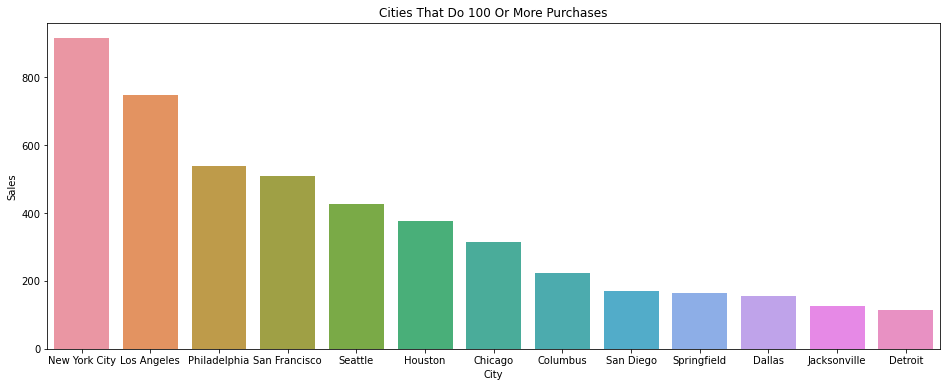

In [8]:
#A bar plot showing cities that do 100 or more purchases
plt.figure(figsize=(16,6))
sns.barplot(x=keys, y=values)
plt.title('Cities That Do 100 Or More Purchases')
plt.xlabel('City')
plt.ylabel('Sales');

In [9]:
profit_and_losses = df['Profit']
dict_profit_and_losses = dict(profit_and_losses)

In [10]:
profits = []
losses = []
no_profit_or_loss = []
for key, value in dict_profit_and_losses.items():
    if value > 0:
        profits.append(value)
    elif value < 0:
        losses.append(value)
    elif value == 0:
        no_profit_or_loss.append(value)
        
total_profits = sum(profits)
total_losses = sum(losses)

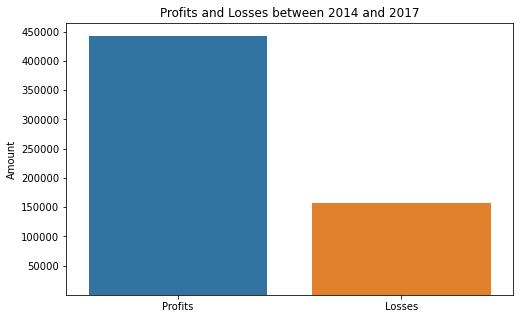

In [11]:
#A bar plot showing profits and losses of the Store between 2014 and 2016
xvalues = ['Profits', 'Losses']
yvalues = [total_profits, abs(total_losses)]

plt.figure(figsize=(8,5))
sns.barplot(x=xvalues, y=yvalues)

plt.title('Profits and Losses between 2014 and 2017')
plt.ylabel('Amount')
yticks = np.arange(50000, 500000, 50000)
plt.yticks(yticks);

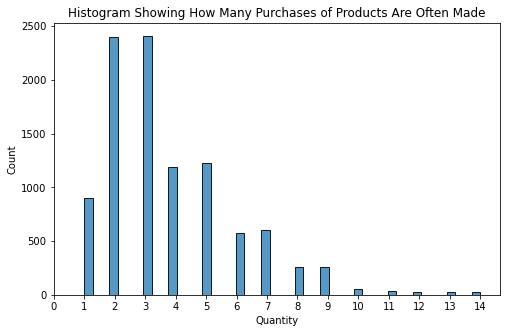

In [12]:
#A histogram showing how many purchases of products are often made
plt.figure(figsize=(8,5))

sns.histplot(df['Quantity'])
xticks = np.arange(0,15,1)
plt.xticks(xticks)

plt.title('Histogram Showing How Many Purchases of Products Are Often Made');

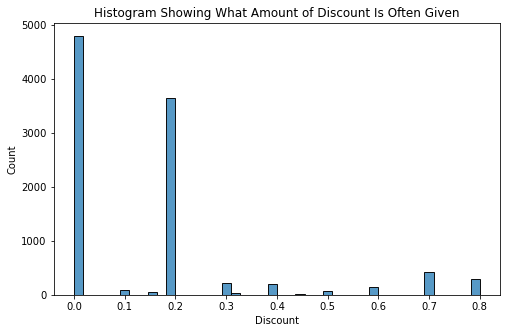

In [13]:
#A histogram showing what amount of discount is often given
plt.figure(figsize=(8,5))

sns.histplot(df['Discount'])
plt.title('Histogram Showing What Amount of Discount Is Often Given');

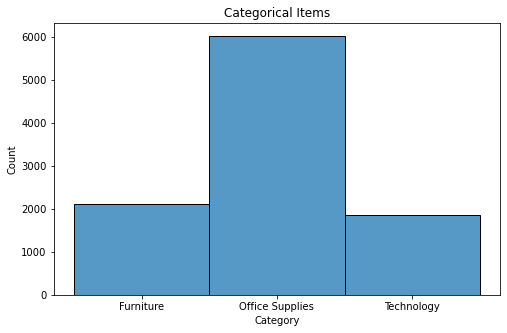

In [14]:
#Office supplies are the most selling items
plt.figure(figsize=(8,5))

sns.histplot(df['Category'])
plt.title('Categorical Items');

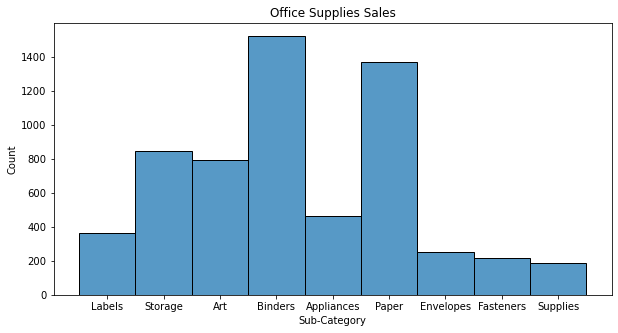

In [15]:
#Binders are the most selling items in Office supplies
x = df['Sub-Category'][df['Category']=='Office Supplies']

plt.figure(figsize=(10,5))

sns.histplot(x, bins=9)
plt.title('Office Supplies Sales');

In [16]:
#Separating the Dataset with quantity of products

#From the above histogram with the xlabel 'Quantity' we see a lot of purchases are between 1 and 7 and less between 8 and 14
#We'll use this information to see how it affects City
#Between 1 and 7
quantity7 = df[df['Quantity'] <=7.5]
quantity7.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
#Between 8 and 14
quantity14 = df[df['Quantity'] > 7.5]
quantity14.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.2,85.3092
37,38,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,Central,OFF-EN-10002986,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.328,9,0.2,35.4150
67,68,CA-2014-106376,2014-12-05,2014-12-10,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,Arizona,85234,West,OFF-AR-10002671,Office Supplies,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...,1113.024,8,0.2,111.3024
72,73,US-2015-134026,2015-04-26,2015-05-02,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,Tennessee,38109,South,FUR-CH-10000513,Furniture,Chairs,High-Back Leather Manager's Chair,831.936,8,0.2,-114.3912
106,107,CA-2017-119004,2017-11-23,2017-11-28,Standard Class,JM-15250,Janet Martin,Consumer,United States,Charlotte,North Carolina,28205,South,TEC-AC-10003499,Technology,Accessories,Memorex Mini Travel Drive 8 GB USB 2.0 Flash D...,74.112,8,0.2,17.6016


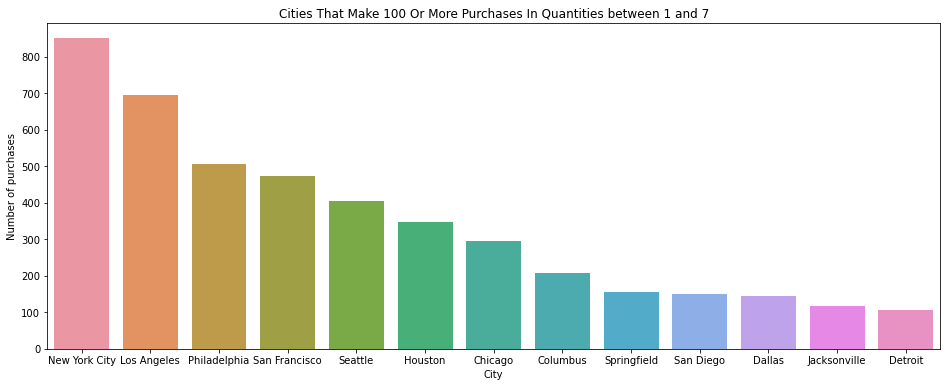

In [18]:
#In the 2 bar plots below we can see cities change depending on quantities of purchases

quantity7_cities = quantity7['City'].value_counts()
dict_quantity7_cities = dict(quantity7_cities)

keys = []
values = []
for key, value in dict_quantity7_cities.items():
    if value >= 100:
        keys.append(key)
        values.append(value)


plt.figure(figsize=(16,6))
sns.barplot(x=keys, y=values)

plt.xlabel('City')
plt.ylabel('Number of purchases')
plt.title('Cities That Make 100 Or More Purchases In Quantities between 1 and 7');

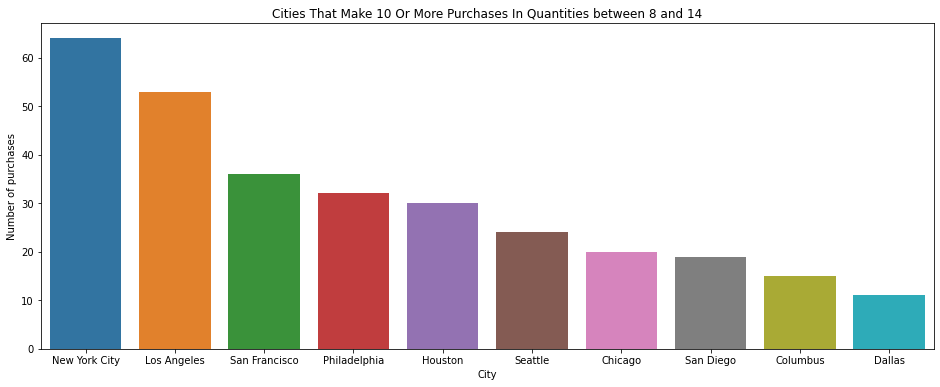

In [19]:
quantity14_cities = quantity14['City'].value_counts()
dict_quantity14_cities = dict(quantity14_cities)
#dict_quantity14_cities

keys = []
values = []
for key, value in dict_quantity14_cities.items():
    if value >= 10:
        keys.append(key)
        values.append(value)


plt.figure(figsize=(16,6))
sns.barplot(x=keys, y=values)

plt.xlabel('City')
plt.ylabel('Number of purchases')
plt.title('Cities That Make 10 Or More Purchases In Quantities between 8 and 14');

In [20]:
#Answering second bit of the question, how quantity affects sales
quant7 = quantity7['Sales']
quant14 = quantity14['Sales']

dict_quant7 = dict(quant7)
dict_quant14 = dict(quant14)

quant7_sales = []
quant14_sales = []

for key, value in dict_quant7.items():
    quant7_sales.append(value)
for key, value in dict_quant14.items():
    quant14_sales.append(value)
    
total_7 = sum(quant7_sales)
total_14 = sum(quant14_sales)
print(total_7, total_14)

1950767.3931999505 346433.46710000024


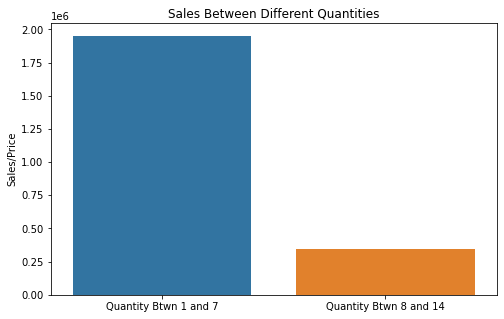

In [21]:
#A barplot to show the difference
xvalues = ['Quantity Btwn 1 and 7', 'Quantity Btwn 8 and 14']
yvalues = [total_7, total_14]

plt.figure(figsize=(8,5))
sns.barplot(x=xvalues, y=yvalues)
plt.ylabel('Sales/Price')
plt.title('Sales Between Different Quantities');

In [22]:
#Renaming 'Sales' as 'Price' since it makes more sense
df.rename(columns={'Sales': 'Price'}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Price,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [23]:
#Calculating correlation using numpy

#Correlation between price and quantity
correlation_quantity = np.corrcoef(df['Price'], df['Quantity'])
corr_qua = correlation_quantity[0][1]

#correlation between price and discount
correlation_discount = np.corrcoef(df['Price'], df['Discount'])
corr_dis = correlation_discount[0][1]

#Correlation between price and profit
correlation_profit = np.corrcoef(df['Price'], df['Profit'])
corr_pro = correlation_profit[0][1]

print(f"Correlation with Quantity: {corr_qua}\nCorrelation with Discount: {corr_dis}\nCorrelation with Profit: {corr_pro}")

Correlation with Quantity: 0.20079477137389767
Correlation with Discount: -0.028190124157535572
Correlation with Profit: 0.4790643497377061


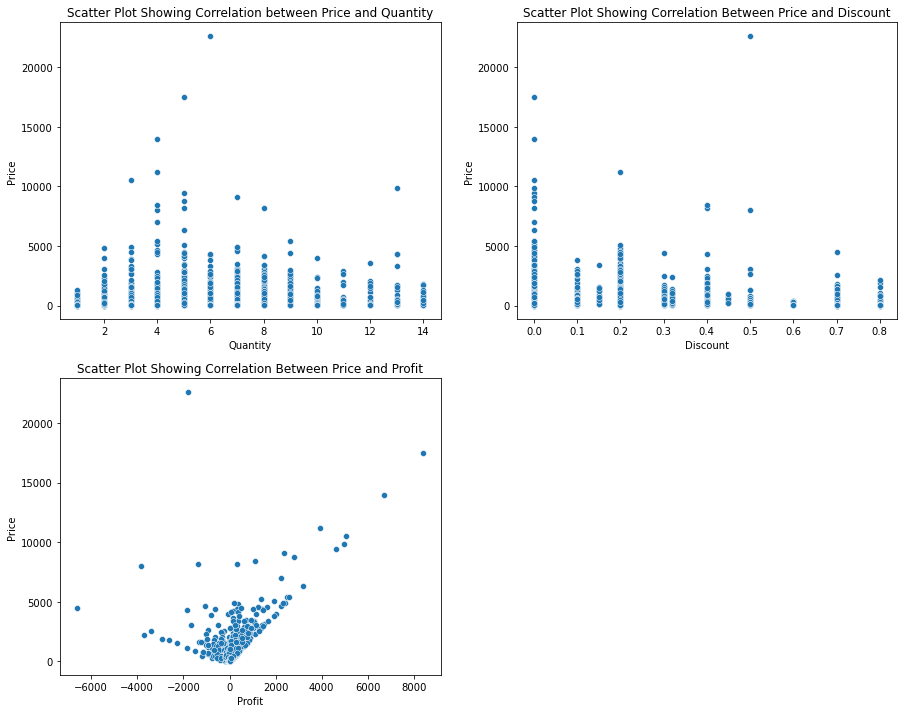

In [24]:
#Using a scatter plot to show correlation of Price between Quantity,Discount and Prof. There is no correlation
plt.figure(figsize=(15,12))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)

sns.scatterplot(x='Quantity', y='Price', ax=ax1, data=df)
ax1.title.set_text('Scatter Plot Showing Correlation between Price and Quantity')
sns.scatterplot(x='Discount', y='Price', ax=ax2, data=df)
ax2.title.set_text('Scatter Plot Showing Correlation Between Price and Discount')
sns.scatterplot(x='Profit', y='Price', ax=ax3, data=df)
ax3.title.set_text('Scatter Plot Showing Correlation Between Price and Profit')

The 2 Plots above show us that there is no correlation between certain elements in the store. An increase in price does not necessarily mean a decrease in the number of purchases(Quantity).
An increase in Price doesn't necessarily mean an increase in Discount.

In the Third Plot though we see a slight relation between Price and Profit. An increase in Price also results in an increase in 
Profit

In [25]:
#Creating a column 'Year' that indicates the year of purchase
df['Year'] = df['Order Date'].dt.year
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Price,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [26]:
#Separating the dataset by year of purchase
df_2014 = df[df['Year']==2014]
df_2015 = df[df['Year']==2015]
df_2016 = df[df['Year']==2016]
df_2017 = df[df['Year']==2017]

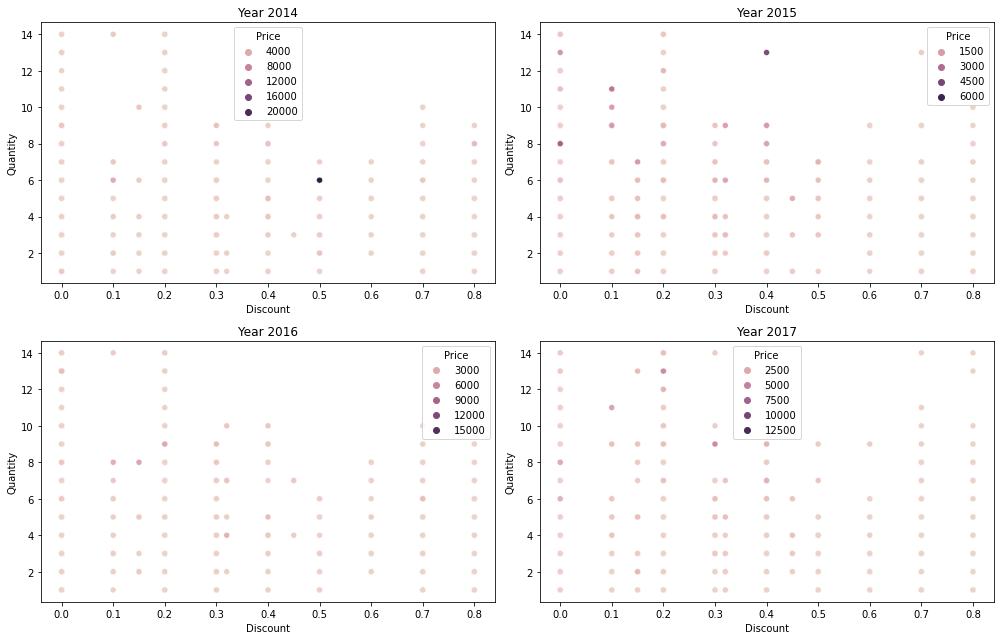

In [27]:
#Scatter plots to show relationship between Discount and Quantity and how it affects Price
fig, axes = plt.subplots(2,2, figsize=(14,9))
fig.set_tight_layout(True)

sns.scatterplot(x='Discount', y='Quantity', hue='Price', ax=axes[0,0], data=df_2014)
axes[0,0].title.set_text('Year 2014')
sns.scatterplot(x='Discount', y='Quantity', hue='Price', ax=axes[0,1], data=df_2015)
axes[0,1].title.set_text('Year 2015')
sns.scatterplot(x='Discount', y='Quantity', hue='Price', ax=axes[1,0], data=df_2016)
axes[1,0].title.set_text('Year 2016')
sns.scatterplot(x='Discount', y='Quantity', hue='Price', ax=axes[1,1], data=df_2017)
axes[1,1].title.set_text('Year 2017')

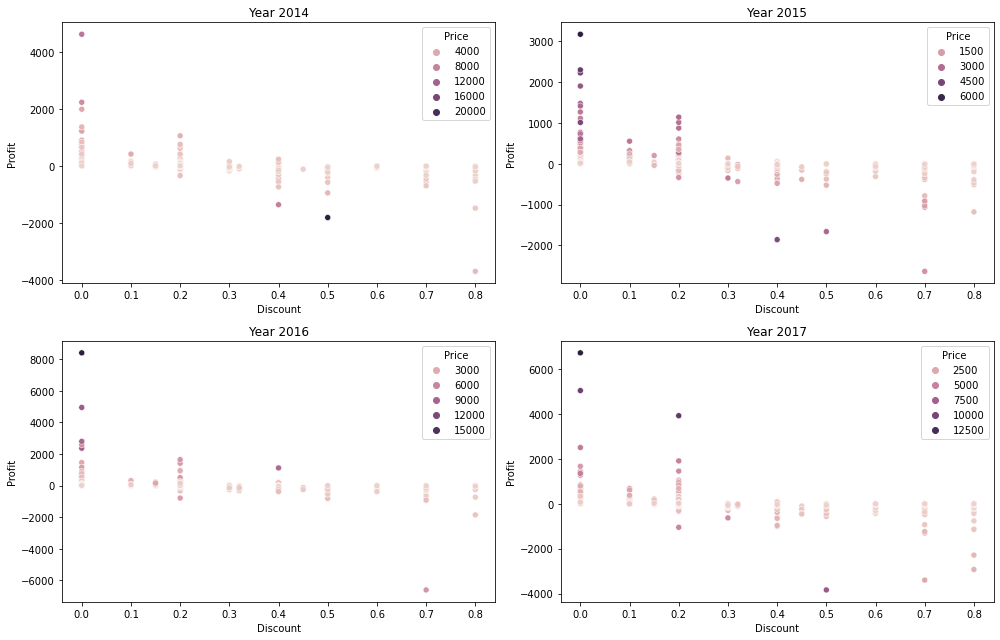

In [28]:
#Scatter plots to show relationship between Discount and Profit and how it affects Price
#Price is highest when there is high profit and low/no discount
fig, axes = plt.subplots(2,2, figsize=(14,9))
fig.set_tight_layout(True)

sns.scatterplot(x='Discount', y='Profit', hue='Price', ax=axes[0,0], data=df_2014)
axes[0,0].title.set_text('Year 2014')
sns.scatterplot(x='Discount', y='Profit', hue='Price', ax=axes[0,1], data=df_2015)
axes[0,1].title.set_text('Year 2015')
sns.scatterplot(x='Discount', y='Profit', hue='Price', ax=axes[1,0], data=df_2016)
axes[1,0].title.set_text('Year 2016')
sns.scatterplot(x='Discount', y='Profit', hue='Price', ax=axes[1,1], data=df_2017)
axes[1,1].title.set_text('Year 2017')

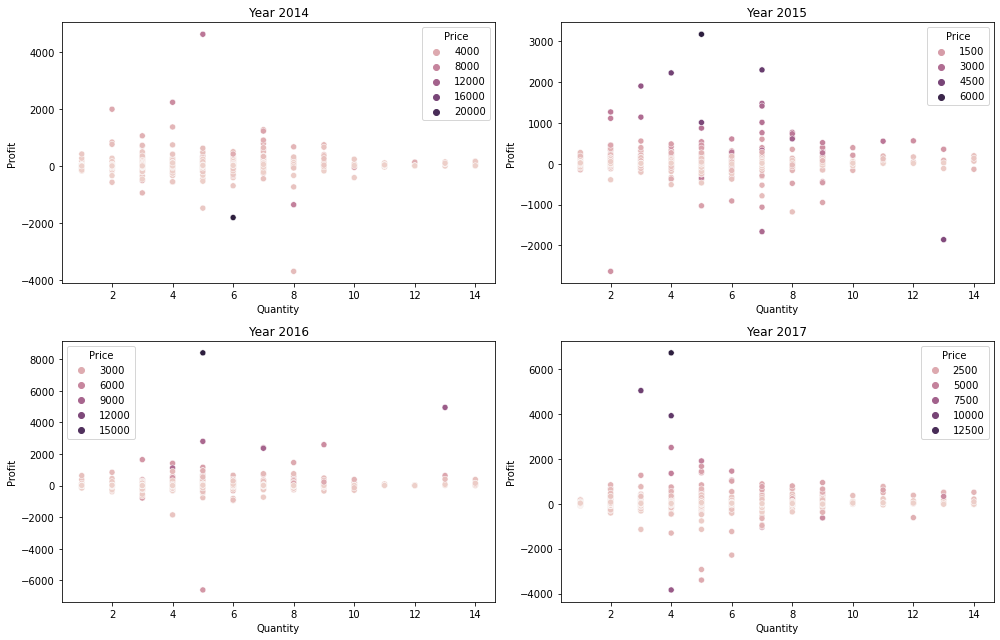

In [36]:
#Scatter plots to show relationship between Quantity and Profit and how it affects Price
#Price is highest when profit is high and goods are purchased in large quantities
fig, axes = plt.subplots(2,2, figsize=(14,9))
fig.set_tight_layout(True)

sns.scatterplot(x='Quantity', y='Profit', hue='Price', ax=axes[0,0], data=df_2014)
axes[0,0].title.set_text('Year 2014')
sns.scatterplot(x='Quantity', y='Profit', hue='Price', ax=axes[0,1], data=df_2015)
axes[0,1].title.set_text('Year 2015')
sns.scatterplot(x='Quantity', y='Profit', hue='Price', ax=axes[1,0], data=df_2016)
axes[1,0].title.set_text('Year 2016')
sns.scatterplot(x='Quantity', y='Profit', hue='Price', ax=axes[1,1], data=df_2017)
axes[1,1].title.set_text('Year 2017')